<a href="https://colab.research.google.com/github/smf-9000/images-through-ML/blob/main/resNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## dataset 3 (dataset 2 with OOM prevention because of colab)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# !mkdir /content/dataset_2
# !unzip "/content/drive/MyDrive/MY-WORK/datasets/image data of Natural Scenes around the world [kaggle]/archive.zip" -d /content/dataset_2
!unzip "/content/drive/MyDrive/dataset_shortcuts/archive.zip" -d /content/dataset_2

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
train_ds = train_data_gen.flow_from_directory(
        '/content/dataset_2/seg_train/seg_train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [ ]:
val_ds = test_data_gen.flow_from_directory(
        '/content/dataset_2/seg_test/seg_test',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [ ]:
class_names = train_ds.class_indices
print('class_names', class_names)
no_of_classes = len(class_names)
print('no_of_classes', no_of_classes)

class_names {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
no_of_classes 6




```
# -----------------------------------------------------------
```



## dataset 2



```
{
  'buildings',
  'forest',
  'glacier',
  'mountain',
  'sea',
  'street'
}
```



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!mkdir /content/dataset_2
# !unzip "/content/drive/MyDrive/MY-WORK/datasets/image data of Natural Scenes around the world [kaggle]/archive.zip" -d /content/dataset_2
!unzip "/content/drive/MyDrive/dataset_shortcuts/archive.zip" -d /content/dataset_2

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/dataset_2/seg_train/seg_train",
  validation_split=0.4,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 8421 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/dataset_2/seg_train/seg_train",
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
no_of_classes = len(class_names)
print(no_of_classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



```
# -----------------------------------------------------------
```



## dataset 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir='/content')
data_dir = pathlib.Path(data_dir)

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
no_of_classes = len(class_names)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



```
# -----------------------------------------------------------
```



## old dataset

In [ ]:
import tensorflow as tf
import pathlib
import os
import pandas as pd 

In [ ]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir='/content')
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
path_str = '/content/datasets/flower_photos'

dataset_path = [name for name in os.listdir(path_str) if os.path.isdir(os.path.join(path_str, name))]

flower_types = [name for name in os.listdir(path_str) if os.path.isdir(os.path.join(path_str, name))]
print (flower_types)

no_of_classes = len(flower_types)

['dandelion', 'roses', 'sunflowers', 'tulips', 'daisy']


In [ ]:
flowers = []

for item in flower_types:
  tmp_flowers_list = os.listdir(path_str + '/' +item)

  for flower in tmp_flowers_list:
    flowers.append((item, str(path_str + '/' +item) + '/' + flower))

# flowers

In [ ]:
flowers_df = pd.DataFrame(data=flowers, columns=['class', 'image'])
flowers_df.head()

,class,image
0,dandelion,path_str/dandelion/129019877_8eea2978ca_m.jpg
1,dandelion,path_str/dandelion/5629940298_634f35125c.jpg
2,dandelion,path_str/dandelion/2503034372_db7867de51_m.jpg
3,dandelion,path_str/dandelion/2444241718_3ca53ce921.jpg
4,dandelion,path_str/dandelion/19617643201_9922eec796.jpg


In [ ]:
flower_count = flowers_df['class'].value_counts()

flower_count

dandelion     898
tulips        799
sunflowers    699
roses         641
daisy         633
Name: class, dtype: int64

In [ ]:
import cv2
import numpy as np 


In [ ]:
im_size = 224
images = []
labels = []

for _cl in flower_types:
  data_path = path_str + '/' + _cl
  filenames = [f_name for f_name in os.listdir(data_path) ]
  for f in filenames:
    img = cv2.imread(data_path + '/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
    labels.append(_cl)
labels    

In [ ]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape   

(3670, 224, 224, 3)

In [ ]:
images = images.astype('float32') / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = flowers_df['class'].values

labelencoder = LabelEncoder()
y = labelencoder.fit_transform (y)

Y = y

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.1, random_state=42)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3303, 224, 224, 3)
(3303,)
(367, 224, 224, 3)
(367,)




```
# -----------------------------------------------------------
```



## code

In [ ]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.05),
    layers.experimental.preprocessing.RandomZoom(0.05),
  ]
)

In [ ]:
# plt.figure(figsize=(10, 10))
# image = train_ds.next()[0]
# for i in range(9):
#   augmented_images = data_augmentation(image)
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_images[0].numpy().astype("uint8"))
#   plt.axis("off")

In [ ]:
def id_block(input_tensor, kernel_size, filters, L, B):
  L = str(L) + '_' + 'idBlock_'
  B = str(B)

  filters_1, filters_2, filters_3 = filters
  
  # whenever we use resNet, next three lines are always go together !!!!!
  X = layers.Conv2D(filters = filters_1, kernel_size = (1, 1), strides = (1,1), name=L + B + '_' + 'conv2d_1')(input_tensor)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_1')(X)
  X = layers.Activation('relu', name=L + B + '_' + 'relu_1')(X)

  X = layers.Conv2D(filters = filters_2, kernel_size = kernel_size, strides = (1,1), padding = 'same', name=L + B + '_' + 'conv2d_2')(X)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_2')(X)
  X = layers.Activation('relu', name=L + B + '_' + 'relu_2')(X)

  X = layers.Conv2D(filters = filters_3, kernel_size = (1, 1), strides = (1,1), name=L + B + '_' + 'conv2d_3')(X)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_3')(X)

  X = layers.Add(name=L + B + '_' + 'add_1')([X, input_tensor])
  X = layers.Activation('relu', name=L + B + '_' + 'relu_3')(X)  # !!!!!
  
  return X

In [ ]:
# when X is different shape than X_shortcut !!!!!
def conv_block(input_tensor, kernel_size, filters, L, B, strides = (2,2)):
  L = str(L) + '_' + 'convBlock_'
  B = str(B)

  filters_1, filters_2, filters_3 = filters
  
  X = layers.Conv2D(filters = filters_1, kernel_size = (1, 1), strides = strides, name=L + B + '_' + 'conv2d_1')(input_tensor)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_1')(X)
  X = layers.Activation('relu', name=L + B + '_' + 'relu_1')(X)

  X = layers.Conv2D(filters = filters_2, kernel_size = kernel_size, strides = (1,1), padding = 'same', name=L + B + '_' + 'conv2d_2')(X)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_2')(X)
  X = layers.Activation('relu', name=L + B + '_' + 'relu_2')(X)

  X = layers.Conv2D(filters = filters_3, kernel_size = (1, 1), strides = (1,1), name=L + B + '_' + 'conv2d_3')(X)
  X = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_3')(X)

  # !!!!!
  X_shortcut = layers.Conv2D(filters = filters_3, kernel_size = (1, 1), strides = strides, name=L + B + '_' + 'conv2d_sc')(input_tensor)
  X_shortcut = layers.BatchNormalization(axis = 3, name=L + B + '_' + 'bn_sc')(X_shortcut)

  X = layers.Add(name=L + B + '_' + 'add_1')([X, X_shortcut])
  X = layers.Activation('relu', name=L + B + '_' + 'relu_3')(X) # !!!!!
  
  return X


# ResNet 50 

In [ ]:

def ResNet50(input_shape=(224, 224, 3), classes=no_of_classes):

  X_input = layers.Input(input_shape)

  # X = data_augmentation(X_input)
  X = layers.experimental.preprocessing.Rescaling(1./255)(X_input)

  X = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(X) 
  X = layers.BatchNormalization(axis=3)(X) 
  X = layers.Activation('relu')(X)
  X = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(X)

  # x = layers.ZeroPadding2D((3, 3))(X)
  # x = layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
  # x = layers.BatchNormalization(axis=3, name='bn_conv1')(x)
  # x = layers.Activation('relu')(x)
  # X = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

  X = conv_block(X, kernel_size=(3,3), filters=[64, 64, 256], L=1, B=1, strides=(1, 1))
  X = id_block(X, kernel_size=(3,3), filters=[64, 64, 256], L=1, B=2) 
  X = id_block(X, kernel_size=(3,3), filters=[64, 64, 256], L=1, B=3)

  X = conv_block(X, kernel_size=(3,3), filters=[128, 128, 512], L=2, B=1)
  X = id_block(X, kernel_size=(3,3), filters=[128, 128, 512], L=2, B=2)
  X = id_block(X, kernel_size=(3,3), filters=[128, 128, 512], L=2, B=3)
  X = id_block(X, kernel_size=(3,3), filters=[128, 128, 512], L=2, B=4)

  X = conv_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=1)
  X = id_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=2)
  X = id_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=3)
  X = id_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=4)
  X = id_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=5)
  X = id_block(X, kernel_size=(3,3), filters=[256, 256, 1024], L=3, B=6)

  X = conv_block(X, kernel_size=(3,3), filters=[512, 512, 2048], L=4, B=1)
  X = id_block(X, kernel_size=(3,3), filters=[512, 512, 2048], L=4, B=2)
  X = id_block(X, kernel_size=(3,3), filters=[512, 512, 2048], L=4, B=3)

  X = layers.AveragePooling2D((7,7), strides=(7,7), name="avg_pool")(X)

  X = layers.Flatten()(X)
  # X = layers.Dense(2048, activation='relu')(X)
  # X = layers.Dropout(rate=0.2)(X)
  # X = layers.Dense(512, activation='relu')(X)
  # X = layers.Dropout(rate=0.2)(X)
  X = layers.Dense(classes, name='fc' + str(classes))(X) # activation='softmax',
  
  model = Model(inputs = X_input, outputs = X, name='resNet_50')

  return model


In [ ]:
model = ResNet50(input_shape = (224, 224, 3), classes = no_of_classes)

In [ ]:
model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), #'adam' # learning_rate=0.00001
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # from_logits=True
          metrics=['accuracy'])  # sparse_categorical_accuracy

In [ ]:
model.summary()

Model: "resNet_50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        rescaling[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________

In [ ]:
def scheduler(epoch, lr):
  if epoch <= 5:
    return 0.05
  else:
    return 0.00001


In [ ]:
lrSchedulerCallback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(
                  train_ds, 
                  epochs = 30, 
                  batch_size = batch_size, 
                  validation_data=val_ds, 
                  validation_batch_size=batch_size) 

Epoch 1/30
220/220 [==============================] - 342s 1s/step - loss: 1.4114 - accuracy: 0.4178 - val_loss: 3.6652 - val_accuracy: 0.1700
Epoch 2/30
220/220 [==============================] - 300s 1s/step - loss: 1.1041 - accuracy: 0.5700 - val_loss: 2.4994 - val_accuracy: 0.2850
Epoch 3/30
220/220 [==============================] - 300s 1s/step - loss: 0.9759 - accuracy: 0.6196 - val_loss: 1.1411 - val_accuracy: 0.5677
Epoch 4/30
220/220 [==============================] - 300s 1s/step - loss: 0.9016 - accuracy: 0.6546 - val_loss: 0.9624 - val_accuracy: 0.6377
Epoch 5/30
220/220 [==============================] - 300s 1s/step - loss: 0.8423 - accuracy: 0.6825 - val_loss: 0.9085 - val_accuracy: 0.6623
Epoch 6/30
220/220 [==============================] - 300s 1s/step - loss: 0.7913 - accuracy: 0.7039 - val_loss: 0.8784 - val_accuracy: 0.6733
Epoch 7/30
220/220 [==============================] - 300s 1s/step - loss: 0.7503 - accuracy: 0.7210 - val_loss: 0.9189 - val_accuracy: 0.6670

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

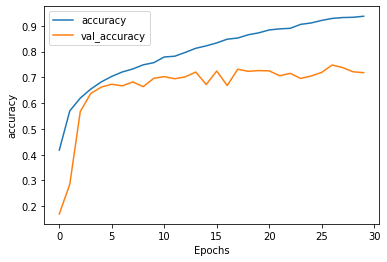

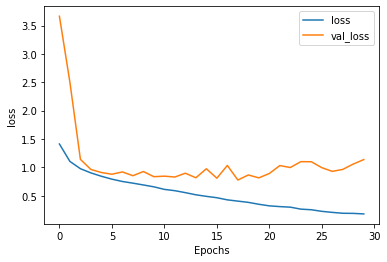

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

In [ ]:
preds = model.evaluate(val_ds)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

47/47 [==============================] - 20s 411ms/step - loss: 1.1369 - accuracy: 0.7183
Loss = 1.136910319328308
Test Accuracy = 0.7183333039283752
